In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

## Intro

You can go long way without knowing the details of Python sytanx. Just load some data and start playing with it. You can, for example, use Python to replace your excel sheets or statistical packages.

## Using Jupyter lab

* moving around
* editing mode
* executing cells
* getting help

## Importing and exploring data

In [2]:
df = pd.read_csv('eeg_powers.csv', index_col=0)

In [3]:
df.head()

,alpha,delta,beta,gamma,state,channel,subject
0,0.109188,0.121637,0.179848,0.041091,focused,AF3,subject_5
1,0.083879,0.078891,0.074366,0.038357,unfocused,AF3,subject_5
2,0.035458,0.109983,0.039020,0.016242,drowsy,AF3,subject_5
3,1.927219,36.255531,0.892434,0.213194,focused,F7,subject_5
4,1.758539,36.506171,0.590528,0.163570,unfocused,F7,subject_5


In [4]:
df.describe()

,alpha,delta,beta,gamma
count,210.000000,210.000000,210.000000,210.000000
mean,3.893512,74.534303,0.639226,0.115020
std,9.307750,262.369517,0.860707,0.182259
min,0.000000,0.000000,0.000000,0.000000
25%,0.072074,0.129839,0.058051,0.026212
50%,1.274391,5.959509,0.356482,0.076365
75%,3.644501,48.477687,0.956902,0.150123
max,71.833644,2933.818633,7.587283,2.111892


## Working with categorical data

In [5]:
df['state'].unique()

array(['focused', 'unfocused', 'drowsy'], dtype=object)

In [6]:
df['state'].value_counts()

unfocused    70
focused      70
drowsy       70
Name: state, dtype: int64

## Plotting distributions

In [7]:
import seaborn as sns

In [8]:
df['alpha'].min()

0.0

<AxesSubplot:>

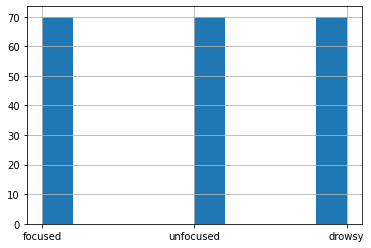

In [9]:
df['state'].hist()

<AxesSubplot:>

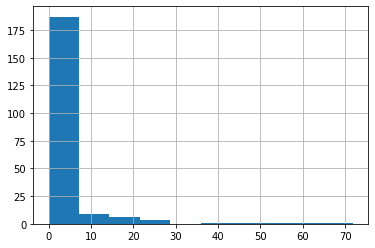

In [10]:
df['alpha'].hist()

/home/bartosz/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alpha', ylabel='Density'>

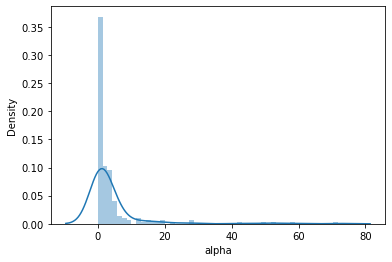

In [11]:
sns.distplot(df['alpha'])

In [12]:
# remove zero column
df = df[df['alpha'] != 0]
df_log = df.copy()

df_log['alpha'] = df['alpha'].apply('log')
df_log['beta'] = df['beta'].apply('log')
df_log['gamma'] = df['gamma'].apply('log')
df_log['delta'] = df['delta'].apply('log')

/home/bartosz/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alpha', ylabel='Density'>

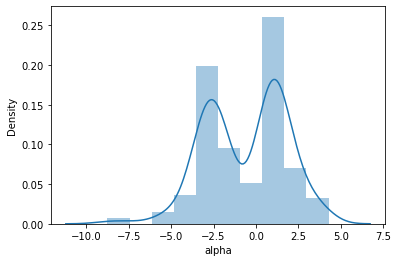

In [13]:
sns.distplot(df_log['alpha'])

## Scatter plots

<AxesSubplot:xlabel='alpha', ylabel='delta'>

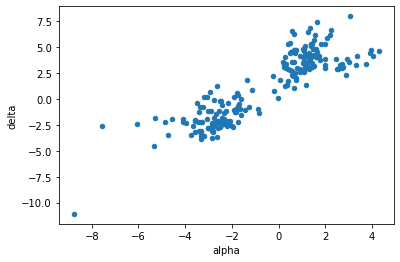

In [14]:
df_log.plot(kind='scatter', x='alpha', y='delta')

Why do we see 2 cluster?
- two different brain states (low vs high power)?
- differences between subjects
- non-scaled data
- artifacts (eye-blinks)
- differences between electrodes

## Compare groups

In [15]:
state_means = df_log.groupby('state').mean()

<AxesSubplot:>

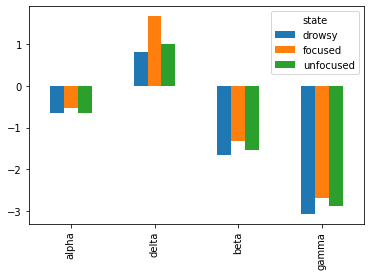

In [16]:
state_means.T.plot.bar()

<AxesSubplot:xlabel='state', ylabel='delta'>

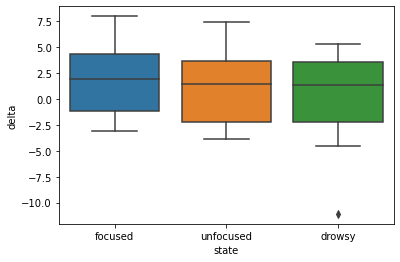

In [17]:
sns.boxplot(x='state', y='delta', data=df_log)

In [18]:
df_log

,alpha,delta,beta,gamma,state,channel,subject
0,-2.214683,-2.106715,-1.715645,-3.191958,focused,AF3,subject_5
1,-2.478376,-2.539694,-2.598762,-3.260806,unfocused,AF3,subject_5
2,-3.339396,-2.207430,-3.243676,-4.120173,drowsy,AF3,subject_5
3,0.656078,3.590592,-0.113803,-1.545552,focused,F7,subject_5
4,0.564483,3.597481,-0.526738,-1.810513,unfocused,F7,subject_5
...,...,...,...,...,...,...,...
205,-3.469193,-2.195682,-2.830449,-3.509048,unfocused,F8,subject_33
206,-2.572097,-1.194097,-3.146518,-3.616630,drowsy,F8,subject_33
207,0.495099,4.469770,-0.107089,-1.551568,focused,AF4,subject_33
208,1.291949,3.637969,-1.028978,-2.410300,unfocused,AF4,subject_33


### Exercise

Compare the powers in gamma and alpha in different electrodes

## Tidy data (advanced)

In order to plot different freq bands and states on the same graphy, we need to reformat the data in the [tidy (long) format](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data). For example, we will use it to plot boxplots with mutliple bar hues: https://seaborn.pydata.org/generated/seaborn.boxplot.html 

<AxesSubplot:xlabel='band', ylabel='power'>

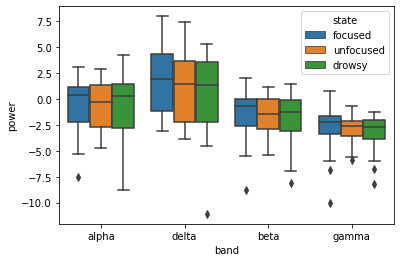

In [19]:
# advanced

df_tidy = df_log.melt(
    id_vars=['subject', 'channel', 'state'],
    value_vars=['alpha', 'delta', 'beta', 'gamma'],
    var_name='band',
    value_name='power')

sns.boxplot(data=df_tidy, x="band", y="power", hue="state")

## Splitting data

<AxesSubplot:xlabel='channel', ylabel='alpha'>

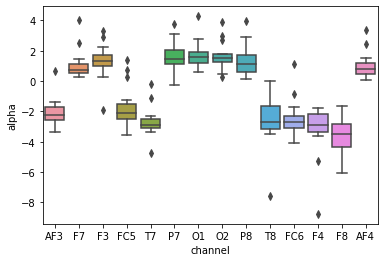

In [20]:
sns.boxplot(x='channel', y='alpha', data=df_log)

In [21]:
df_occ = df_log[df_log['channel'].isin(['O1', 'O2', 'P1', 'P2'])]

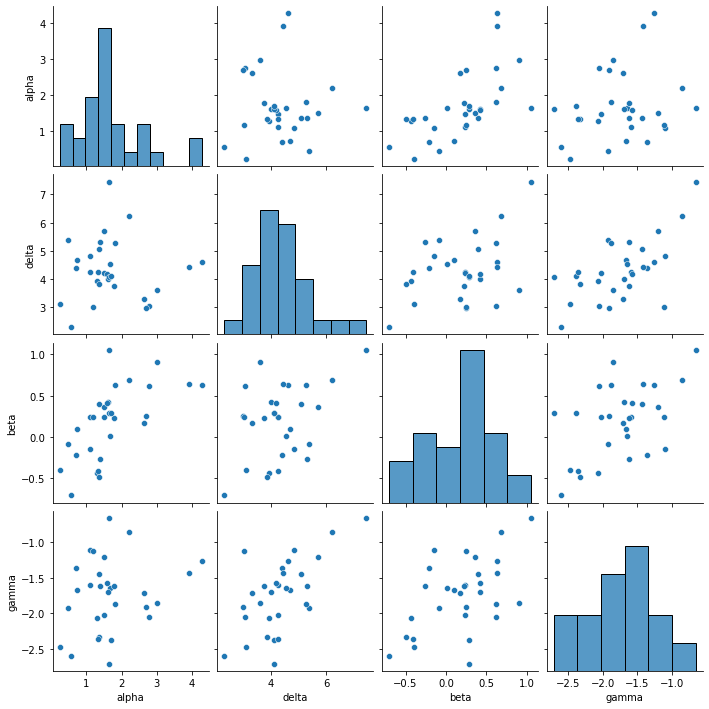

In [22]:
sns.pairplot(df_occ)

## Correlation heatmaps

In [23]:
corrmat = df_occ[['delta', 'alpha', 'beta', 'gamma']].corr()

<AxesSubplot:>

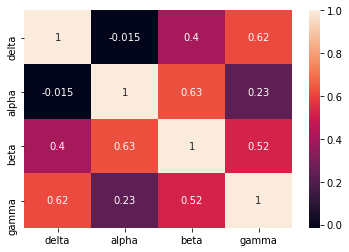

In [24]:
sns.heatmap(corrmat, annot=True)

## Statistics

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
lm = ols('delta ~ C(state)', data=df_log).fit()

In [27]:
print(sm.stats.anova_lm(lm, ))

             df       sum_sq    mean_sq         F    PR(>F)
C(state)    2.0    28.216139  14.108070  1.363467  0.258071
Residual  206.0  2131.523530  10.347202       NaN       NaN


## Clustering

In [28]:
from sklearn import cluster

In [29]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(df_log[['delta', 'alpha', 'beta', 'gamma']])

KMeans(n_clusters=2)

In [30]:
labels = kmeans.labels_

<AxesSubplot:xlabel='alpha', ylabel='delta'>

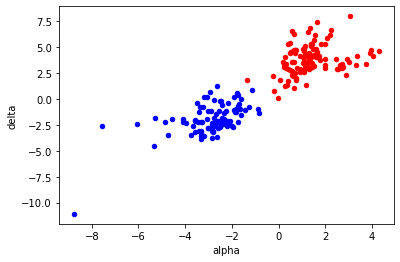

In [31]:
ax = df_log[labels==0].plot(kind='scatter', x='alpha', y='delta', c='r')
df_log[labels==1].plot(kind='scatter', x='alpha', y='delta', c='b', ax=ax)

##  Group-by -- revisited

In [32]:
df_labels = df_log.copy()
df_labels['class'] = labels

In [33]:
counts = df_labels.groupby('class')['channel'].value_counts()

<AxesSubplot:xlabel='channel'>

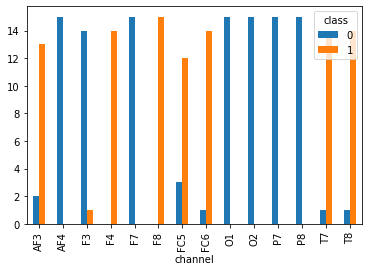

In [34]:
counts.unstack().T.plot.bar()